In [4]:
import pandas as pd
from odo import odo, discover, resource
# from bokeh.charts import Bar, TimeSeries, output_file, show, output_notebook
from altair import Chart, X, Y, Axis, SortField, Bin
# output_notebook()

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 999

In [6]:
discover(resource('data/2016-Liberal-Contributions.csv'))

dshape("var * {DonorName: ?string, Amount: float64, Date: ?datetime}")

In [7]:
liberal_contributions = odo('data/2016-Liberal-Contributions.csv', \
                            pd.DataFrame)
liberal_contributions.describe()

,Amount
count,15941.000000
mean,762.673077
std,4237.766055
min,5.000000
25%,50.000000
50%,125.000000
75%,300.000000
max,200000.000000


In [8]:
liberal_contributions.sort_values(by='Amount', ascending=False).head(10)

,DonorName,Amount,Date
7857,John Redekop Construction,200000.0,2016-02-26
21,2300 Kingsway Residences,200000.0,2016-02-26
12154,PWO Investments Ltd.,100000.0,2016-02-26
1380,BJW Investment Ltd.,100000.0,2016-02-26
14460,Teck Resources Limited,100000.0,2016-12-22
10376,MCL Motors 2010,100000.0,2016-03-04
3611,Dennis J. Wilson,100000.0,2016-03-04
1241,Bert's Electric (2001) Ltd.,100000.0,2016-02-26
13256,RPMG Holdings Ltd.,100000.0,2016-02-26
13543,Seaspan ULC,100000.0,2016-02-26


In [9]:
top10_donors = liberal_contributions.groupby('DonorName')['Amount'] \
.sum().sort_values(ascending=False).head(10)

top10_donors

DonorName
Peter Redekop                        250000.0
2300 Kingsway Residences             200000.0
John Redekop Construction            200000.0
Aquilini Investment Group LP         131000.0
Teck Resources Limited               128650.0
New Car Dealers Association of BC    109550.0
MCL Motors 2010                      109000.0
Seaspan ULC                          107050.0
Dennis J. Wilson                     100500.0
Rick Ilich                           100000.0
Name: Amount, dtype: float64

In [10]:
liberal_contributions.groupby('DonorName')['Amount'] \
.count().sort_values(ascending=False).head(10)

DonorName
Gateway Casinos and Entertainment Limited    33
New Car Dealers Association of BC            19
Great Canadian Gaming Corp.                  17
LifeLabs Inc                                 17
Janet Smukowich                              15
Insurance Bureau of Canada                   13
Encana Corporation Ltd                       13
Stephen P. Roberts                           13
Anthem Properties Corp Ltd                   11
First West Credit Union                      11
Name: Amount, dtype: int64

In [11]:
liberal_contributions.loc[liberal_contributions['DonorName']\
                          .isin(top10_donors.keys())]
                          

,DonorName,Amount,Date
21,2300 Kingsway Residences,200000.0,2016-02-26
777,Aquilini Investment Group LP,2500.0,2016-01-01
778,Aquilini Investment Group LP,2500.0,2016-01-31
779,Aquilini Investment Group LP,10000.0,2016-02-26
780,Aquilini Investment Group LP,10000.0,2016-04-01
781,Aquilini Investment Group LP,25000.0,2016-04-22
782,Aquilini Investment Group LP,75000.0,2016-10-11
...,...,...,...
13543,Seaspan ULC,100000.0,2016-02-26
13544,Seaspan ULC,5000.0,2016-03-31


In [12]:
# Search in df
liberal_contributions[liberal_contributions['DonorName']\
                      .str.contains("Forest Professionals")]

,DonorName,Amount,Date
889,Association of British Columbia Forest Profess...,4000.0,2016-06-24


In [13]:
# liberal_contributions.sort_values(by='Date')

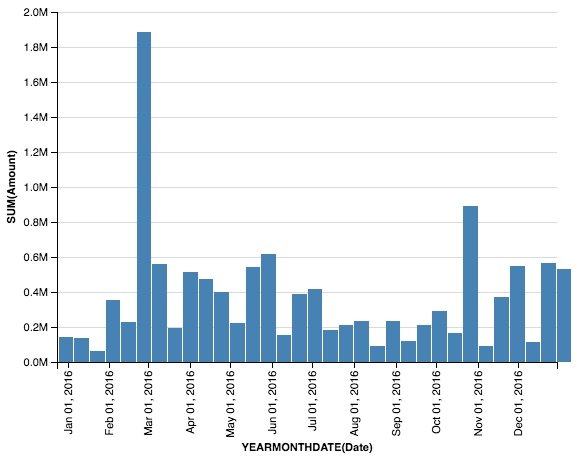

In [14]:
# Sum of contributions over the year, by week
p = Chart(liberal_contributions).mark_bar().encode(
    x=X(
        'Date:T', 
        bin = Bin( maxbins = 52),
        timeUnit = "yearmonthdate"
    ), 
    y=Y(
        'Amount',
        aggregate = 'sum'
    )
)
p

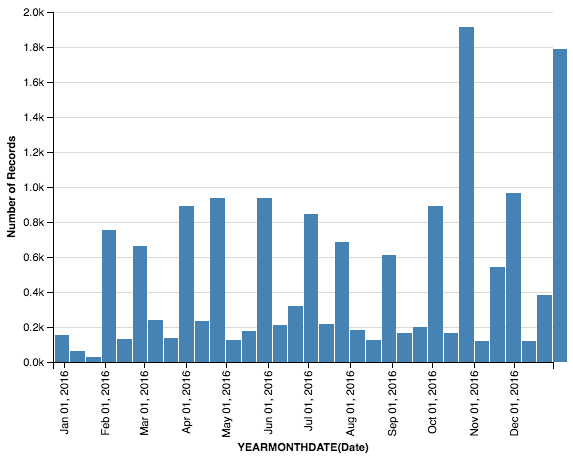

In [15]:
# Count of contributions over the year
p = Chart(liberal_contributions).mark_bar().encode(
    x=X(
        'Date:T', 
        bin = Bin( maxbins=52 ),
        timeUnit = "yearmonthdate"
    ), 
    y=Y(
        'Amount',
        aggregate = 'count'
    )
)
p

In [16]:
contributions_by_week = liberal_contributions.groupby('Date')['Amount']\
        .sum().reset_index()
contributions_by_week['cumulative'] = \
        contributions_by_week['Amount'].cumsum()

# contributions_by_week

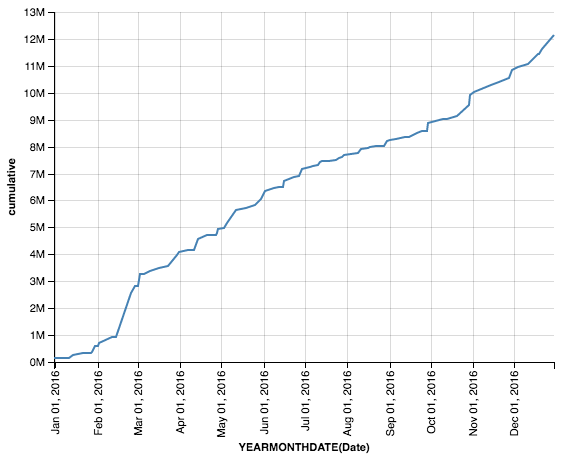

In [17]:
p = Chart(contributions_by_week).mark_line().encode(
    x=X(
        'Date:T', 
        timeUnit = "yearmonthdate",
        axis = Axis ( ticks = 12 )
    ), 
    y='cumulative'
)
p

In [19]:
# liberal_contributions.groupby([liberal_contributions.Date.dt.month,'DonorName'])\
#             .agg({'Amount':sum})
    
# liberal_contributions.groupby(liberal_contributions.Date.dt.month)\
#             ['Amount'].nlargest(2)


Amount
Date DonorName                                      
1    Accent Inns Inc.                          250.0
     Al-Karim Jaffer Somji                    1000.0
     Alan William Dyck                         100.0
     Albert Warkentin                          100.0
     Alberto Joao Simoes                       600.0
     Aleksandar Stojicevic                     200.0
     Alesha Doran                              125.0
...                                              ...
12   Yi Jia International Group (Canada) Ltd  3000.0
     Young Ham                                 100.0
     Zachary White                             300.0
     Zahra Mamdani                            4000.0
     Zenterra Developments                     250.0
     Zoe Oreck                                  25.0
     Zulfiqar Ali                              250.0

[15549 rows x 1 columns]